### 학습 내용
2. 번역 데이터 준비
번역을 위해 영어-스페인어 데이터셋을 사용해보아요.
3. 번역 모델 만들기
번역엔 뭐다? Transformer다!
4. 번역 성능 측정하기
(1) BLEU Score
몇 점이면 훌륭한 번역기라고 할 수 있을까요?
(2) Beam Search Decoder
Beam search + BLEU = ?
5. 데이터 부풀리기
내 모델을 강하고 똑똑하게 만들어 보아요.

### 학습 목표
번역 및 챗봇 성능을 측정하기 위한 지표를 이해하고, 용도에 맞게 만들 수 있다.
NLP task에 맞는 data augmentation의 방법들을 알고, 활용할 수 있다.


### Project: 멋진 챗봇 만들기

Step 2. 데이터 정제
아래 조건을 만족하는 preprocess_sentence() 함수를 구현하세요.


영문자의 경우, 모두 소문자로 변환합니다.
영문자와 한글, 숫자, 그리고 주요 특수문자를 제외하곤 정규식을 활용하여 모두 제거합니다.

문장부호 양옆에 공백을 추가하는 등 이전과 다르게 생략된 기능들은 우리가 사용할 토크나이저가 지원하기 때문에 굳이 구현하지 않아도 괜찮습니다!

Step 3. 데이터 토큰화
토큰화에는 KoNLPy의 mecab 클래스를 사용합니다.
아래 조건을 만족하는 build_corpus() 함수를 구현하세요!


소스 문장 데이터와 타겟 문장 데이터를 입력으로 받습니다.
데이터를 앞서 정의한 preprocess_sentence() 함수로 정제하고, 토큰화합니다.
토큰화는 전달받은 토크나이즈 함수를 사용합니다. 이번엔 mecab.morphs 함수를 전달하시면 됩니다.
토큰의 개수가 일정 길이 이상인 문장은 데이터에서 제외합니다.
중복되는 문장은 데이터에서 제외합니다. 소스 : 타겟 쌍을 비교하지 않고 소스는 소스대로 타겟은 타겟대로 검사합니다. 중복 쌍이 흐트러지지 않도록 유의하세요!

구현한 함수를 활용하여 questions 와 answers 를 각각 que_corpus , ans_corpus 에 토큰화하여 저장합니다.

Step 4. Augmentation
우리에게 주어진 데이터는 1만 개가량으로 적은 편에 속합니다. 이럴 때에 사용할 수 있는 테크닉을 배웠으니 활용해 봐야겠죠? Lexical Substitution을 실제로 적용해 보도록 하겠습니다. 

Step 5. 데이터 벡터화
타겟 데이터인 ans_corpus 에 <start> 토큰과 <end> 토큰이 추가되지 않은 상태이니 이를 먼저 해결한 후 벡터화를 진행합니다. 우리가 구축한 ans_corpus 는 list 형태이기 때문에 아주 쉽게 이를 해결할 수 있답니다!

위 소스를 참고하여 타겟 데이터 전체에 <start> 토큰과 <end> 토큰을 추가해 주세요!

챗봇 훈련 데이터의 가장 큰 특징 중 하나라고 하자면 바로 소스 데이터와 타겟 데이터가 같은 언어를 사용한다는 것이겠죠. 앞서 배운 것처럼 이는 Embedding 층을 공유했을 때 많은 이점을 얻을 수 있습니다.


특수 토큰을 더함으로써 ans_corpus 또한 완성이 되었으니, que_corpus 와 결합하여 전체 데이터에 대한 단어 사전을 구축하고 벡터화하여 enc_train 과 dec_train 을 얻으세요!
Step 6. 훈련하기
앞서 번역 모델을 훈련하며 정의한 Transformer 를 그대로 사용하시면 됩니다! 대신 데이터의 크기가 작으니 하이퍼파라미터를 튜닝해야 과적합을 피할 수 있습니다. 모델을 훈련하고 아래 예문에 대한 답변을 생성하세요! 가장 멋진 답변과 모델의 하이퍼파라미터를 제출하시면 됩니다. \

Step 7. 성능 측정하기
챗봇의 경우, 올바른 대답을 하는지가 중요한 평가 지표입니다. 올바른 답변을 하는지 눈으로 확인할 수 있겠지만, 많은 데이터의 경우는 모든 결과를 확인할 수 없을 것입니다. 주어진 질문에 적절한 답변을 하는지 확인하고, BLEU Score를 계산하는 calculate_bleu() 함수도 적용해 보세요.


# 예문
1. 지루하다, 놀러가고 싶어.
2. 오늘 일찍 일어났더니 피곤하다.
3. 간만에 여자친구랑 데이트 하기로 했어.
4. 집에 있는다는 소리야.

---

# 제출

Translations
> 1. 잠깐 쉬 어도 돼요 . <end>
> 2. 맛난 거 드세요 . <end>
> 3. 떨리 겠 죠 . <end>
> 4. 좋 아 하 면 그럴 수 있 어요 . <end>

Hyperparameters
> n_layers: 1
> d_model: 368
> n_heads: 8
> d_ff: 1024
> dropout: 0.2

Training Parameters
> Warmup Steps: 1000
> Batch Size: 64
> Epoch At: 10


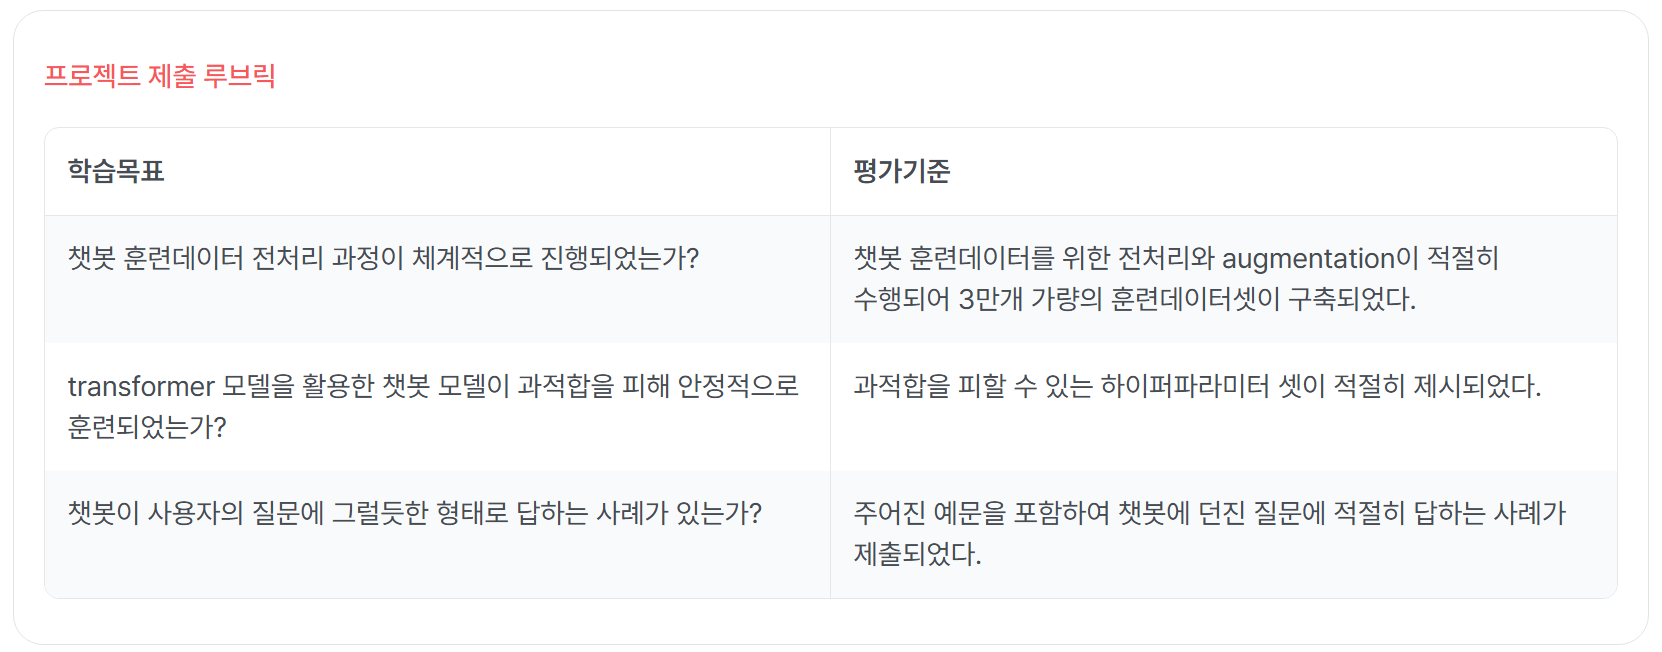

In [ ]:
# 라이브러리 설치하기
!python3 -m pip install --upgrade pip
!python3 -m pip install konlpy # Python 3.x
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh) # MeCab 설치하기


In [1]:
# 라이브러리 임포트
!pip install sentencepiece nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.5/803.5 kB 52.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]2/3 [nltk]


In [2]:
import numpy as np
import pandas as pd
import torch
import sentencepiece as spm
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

import re
import os
import random
import math

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

print(torch.__version__)

2.7.1+cu118


# 0. 데이터 준비

In [4]:
import urllib.request
import zipfile

zip_filename = "spa-eng.zip"
zip_url = "http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip"

urllib.request.urlretrieve(zip_url, zip_filename)

with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_filename))

print("슝=3")

슝=3


In [5]:
extracted_folder = "./spa-eng"
file_path = os.path.join(extracted_folder, "spa.txt")

with open(file_path, "r") as f:
    spa_eng_sentences = f.read().splitlines()

spa_eng_sentences = list(set(spa_eng_sentences))
total_sentence_count = len(spa_eng_sentences)
print("Example:", total_sentence_count)

for sen in spa_eng_sentences[0:100][::20]:
    print(">>", sen)

Example: 118964
>> Tom was surprised that Mary showed up.	Tom se sorprendió de que Mary apareciera.
>> Tom might call Mary tonight.	Tom podría llamar a Mary esta noche.
>> I knew what was at stake.	Sabía lo que estaba en juego.
>> He must be an American.	Él debe de ser estadounidense.
>> My father has been in good shape since his operation.	Mi padre se ha sentido bien desde la operación.


In [6]:
# Q. 전처리 함수를 만들어 보세요. 아래 기능을 추가해주세요.
def preprocess_sentence(sentence):
    sentence = sentence.lower() # 대문자를 소문자로 변환
    sentence = re.sub(r' {2,}', ' ', sentence) # 둘 이상의 공백을 하나의 공백으로 치환
    sentence = sentence.strip() # 문자열 양 끝 공백 제거
    return sentence

In [7]:
spa_eng_sentences = list(map(preprocess_sentence, spa_eng_sentences))

print('슝=3')

슝=3


In [8]:

# 이제 테스트에 사용할 데이터를 따로 떼어냅니다. 전체 데이터의 0.5% 정도를 테스트용으로 사용할게요.

test_sentence_count = total_sentence_count // 200
print("Test Size: ", test_sentence_count)
print("\n")

train_spa_eng_sentences = spa_eng_sentences[:-test_sentence_count]
test_spa_eng_sentences = spa_eng_sentences[-test_sentence_count:]
print("Train Example:", len(train_spa_eng_sentences))
for sen in train_spa_eng_sentences[0:100][::20]:
    print(">>", sen)
print("\n")
print("Test Example:", len(test_spa_eng_sentences))
for sen in test_spa_eng_sentences[0:100][::20]:
    print(">>", sen)

Test Size:  594


Train Example: 118370
>> tom was surprised that mary showed up.	tom se sorprendió de que mary apareciera.
>> tom might call mary tonight.	tom podría llamar a mary esta noche.
>> i knew what was at stake.	sabía lo que estaba en juego.
>> he must be an american.	él debe de ser estadounidense.
>> my father has been in good shape since his operation.	mi padre se ha sentido bien desde la operación.


Test Example: 594
>> we are adjourned until 2:30.	nos han postpuesto hasta las dos y media.
>> i ran toward the door.	corrí hacia la puerta.
>> does tom know how to play the piano?	¿tom sabe tocar el piano?
>> she's heating the water.	ella está calentando el agua.
>> the band upped the number of shows in their tour.	la banda subió el número de shows en su gira.


한 줄에 포함되어 있는 영어와 스페인어를 분리해 줍니다. 영어 문장과 스페인어 문장이 tab으로 연결되어 있으니 split('\t')을 사용하면 나눌 수 있겠네요. tab 이전이 영어, 이후가 스페인어 문장입니다.

In [9]:
def split_spa_eng_sentences(spa_eng_sentences):
    spa_sentences = []
    eng_sentences = []
    for spa_eng_sentence in tqdm(spa_eng_sentences):
        eng_sentence, spa_sentence = spa_eng_sentence.split('\t')
        spa_sentences.append(spa_sentence)
        eng_sentences.append(eng_sentence)
    return eng_sentences, spa_sentences

print('슝=3')

슝=3
